In [57]:
import pandas as pd
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import pairwise_distances
from itertools import combinations
import seaborn as sns
from sklearn import preprocessing

In [58]:
df = pd.read_csv('creditcustomersegmentation.csv')
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [59]:
colunas = df.columns #Criar variável q ue contém as colunas do dataframe 'dfnorm'
colunmslist = colunas.tolist() #Listarde forma organizada 
print('Lista de colunas do dataframe: ', colunmslist)


#Tratamento do dataset
print(df.isnull().sum())
df = df.dropna()
print('')
print( df.isnull().sum())
print(df.shape)
df = df.drop(['CUST_ID'], axis=1)
df

Lista de colunas do dataframe:  ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS   

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [60]:
#Teste de multicolinearidade
colunas = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']
print('Teste de multicolinearidade: ', df[colunas].corr()) #Resultado --------- não há evidências.

#SALDO: O saldo deixado nas contas dos clientes de cartão de crédito.
#COMPRAS: Valor das compras realizadas nas contas dos clientes do cartão de crédito.
#CREDIT_LIMIT: O limite do cartão de crédito.
#Clusterização será baseada em cima desses 3 grupos

Teste de multicolinearidade:                 BALANCE  PURCHASES  CREDIT_LIMIT
BALANCE       1.000000   0.176083      0.535518
PURCHASES     0.176083   1.000000      0.358425
CREDIT_LIMIT  0.535518   0.358425      1.000000


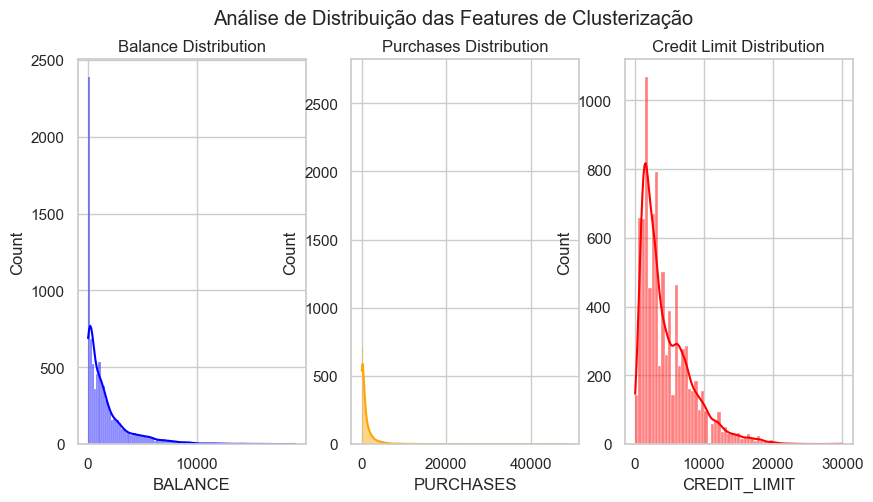

In [61]:
#Gráfico das Distribuições Normais
sns.set(style='whitegrid')

fig, axs = plt.subplots(1, 3, figsize=(10, 5)) #Criando objeto da figura e dos eixos

sns.histplot(data=df, x='BALANCE', kde=True, color='blue', ax=axs[0])
sns.histplot(data=df, x='PURCHASES', kde=True, color='orange', ax=axs[1])
sns.histplot(data=df, x='CREDIT_LIMIT', kde=True, color='red', ax=axs[2])


axs[0].set_title('Balance Distribution')
axs[1].set_title('Purchases Distribution')
axs[2].set_title('Credit Limit Distribution')

fig.suptitle('Análise de Distribuição das Features de Clusterização')
plt.show()

In [62]:
#Métrica de precisão ----------------------- Inetria(WCSS)
def calculate_inertia(X):
    inertia_values = []

# Testar diferentes números de clusters (K) para o K-Means
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        inertia = kmeans.inertia_
        inertia_values.append(inertia)
    print('Métrica de Precisão ------ Inertia: ',inertia_values)

# Plotar um gráfico do valor de Inertia em função do número de clusters (K)
    plt.plot(range(1, 11), inertia_values, marker='o')
    plt.title('Gráfico de Inertia em função do número de clusters (K)')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Inertia (WCSS)')
    plt.show()
    
    return inertia_values


C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\leona\AppData\Local\Packages\PythonSoftw

Métrica de Precisão ------ Inertia:  [25907.999999999975, 16416.471664558896, 12721.699051240455, 9853.787201645197, 8218.41397472351, 6852.5172478146005, 6096.475968261753, 5462.038622220101, 4905.687842036585, 4519.70185933639]


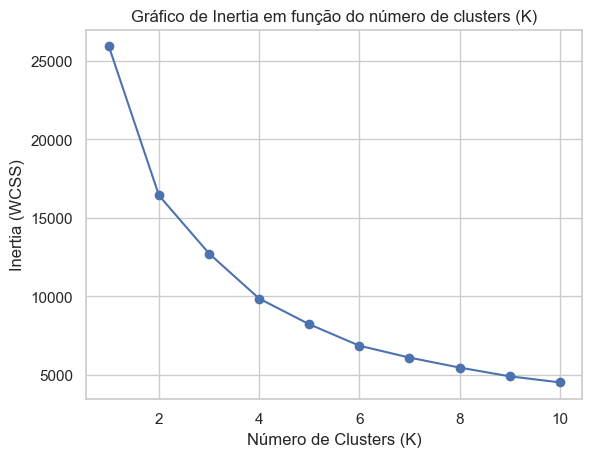

Número ótimo:  5


In [63]:
def optimal_number_of_clusters(inertia_values):
    x1, y1 = 2, inertia_values[0]
    x2, y2 = 11, inertia_values[len(inertia_values)-1]

    distances = []
    for i in range(len(inertia_values)):
        x0 = i+2
        y0 = inertia_values[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = (((y2 - y1)**2 + (x2 - x1)**2)**0.5)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2


clustering_data = df[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']] #Definindo as colunas que serão usadas como parâmetros de definição das clusters
clustering_data = np.array(clustering_data)
clustering_data = preprocessing.scale(clustering_data)
clustering_data = pd.DataFrame(clustering_data)

X = clustering_data
sum_of_squares = calculate_inertia(X)

number_optimal = optimal_number_of_clusters(sum_of_squares)
print('Número ótimo: ', number_optimal)

In [64]:
for i in clustering_data.columns:#Método de redimensionamento, fazendo-se possível comparar as colunas selecionadas do DataFrame.
    MinMaxScaler(i)
    
    
kmeans = KMeans(n_clusters=number_optimal) # Definindo o número de clusters, irá variar de 0 até 4.
clusters = kmeans.fit_predict(clustering_data) #Previsão da segmentação de mercado
df["CREDIT_CARD_SEGMENTS"] = clusters
df['CREDIT_CARD_SEGMENTS'] = pd.DataFrame(df['CREDIT_CARD_SEGMENTS'])
print(df['CREDIT_CARD_SEGMENTS'])

C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0       4
1       0
2       0
4       4
5       4
       ..
8943    4
8945    4
8947    4
8948    4
8949    4
Name: CREDIT_CARD_SEGMENTS, Length: 8636, dtype: int32


In [65]:
#Métrica de precisão ------------------------ Silhuette Score
x = df["CREDIT_CARD_SEGMENTS"].values.reshape(-1, 1)
labels = kmeans.labels_

silhouette_avg = silhouette_score(x, labels)
print('Métrica  de Precisão ------- Silhouette Score: ',silhouette_avg)

Métrica  de Precisão ------- Silhouette Score:  1.0


In [66]:
#Métric de precisão ------------------- Davies Bouldin Index
kmeans = KMeans(n_clusters=number_optimal)
kmeans.fit(X)

# Os centróides dos clusters são acessados usando 'cluster_centers_' após o ajuste.
cluster_centers = kmeans.cluster_centers_




n_clusters = len(cluster_centers)

dbi = 0.0
for i in range(n_clusters):
    max_dissimilarity = 0
    for j in range(n_clusters):
        if i != j:
            dist = pairwise_distances([cluster_centers[i]], [cluster_centers[j]])[0][0]
            if dist > max_dissimilarity:
                max_dissimilarity = dist
    avg_intra_cluster_distance = np.mean(pairwise_distances(X[labels == i], [cluster_centers[i]]))
    dbi += (avg_intra_cluster_distance + avg_intra_cluster_distance) / max_dissimilarity

dbi /= n_clusters

print("DBI:", dbi)

C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



DBI: 1.0857018693263207


In [67]:
#Métrica de precisão --------------- Calinski Harabasz Index

ch_score = calinski_harabasz_score(x, labels)
print("Índice de Calinski-Harabasz:", ch_score)

Índice de Calinski-Harabasz: 1.0


In [68]:
df["CREDIT_CARD_SEGMENTS"] = df["CREDIT_CARD_SEGMENTS"].map({0: "Cluster 1", 1: 
    "Cluster 2", 2: "Cluster 3", 3: "Cluster 4", 4: "Cluster 5", 5: "Cluster 6"}) #Mapeando as clusters

print(df["CREDIT_CARD_SEGMENTS"].head(10)) #Mostrar as clusters dos 10 primeiros usuários.
print(df['CREDIT_CARD_SEGMENTS'].value_counts())
print(df['CREDIT_CARD_SEGMENTS'].value_counts().sum())



0     Cluster 5
1     Cluster 1
2     Cluster 1
4     Cluster 5
5     Cluster 5
6     Cluster 2
7     Cluster 5
8     Cluster 1
9     Cluster 1
10    Cluster 5
Name: CREDIT_CARD_SEGMENTS, dtype: object
CREDIT_CARD_SEGMENTS
Cluster 5    5418
Cluster 1    1915
Cluster 4     912
Cluster 2     367
Cluster 3      24
Name: count, dtype: int64
8636


In [69]:
#Visualização via Web
PLOT = go.Figure()
for i in list(df["CREDIT_CARD_SEGMENTS"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = df[df["CREDIT_CARD_SEGMENTS"]== i]['BALANCE'],
                                y = df[df["CREDIT_CARD_SEGMENTS"] == i]['PURCHASES'],
                                z = df[df["CREDIT_CARD_SEGMENTS"] == i]['CREDIT_LIMIT'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='BALANCE: %{x} <br>PURCHASES %{y} <br>DCREDIT_LIMIT: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'BALANCE', titlefont_color = 'black'),
                                yaxis=dict(title = 'PURCHASES', titlefont_color = 'black'),
                                zaxis=dict(title = 'CREDIT_LIMIT', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))
PLOT.show()